<a href="https://colab.research.google.com/github/palabebek/Machine-Learning/blob/main/Week%203/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('income.csv')  # Ensure the file is in the same directory as the notebook
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Build Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
# Display classification report in tabular format
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()
print(report_dt_df)

Accuracy (Decision Tree): 0.5138057742782153
              precision    recall  f1-score      support
0              0.577005  0.822502  0.678222  4924.000000
1              0.244941  0.102404  0.144427  2246.000000
2              0.456727  0.329623  0.382902  1617.000000
3              0.202500  0.109756  0.142355   738.000000
accuracy       0.513806  0.513806  0.513806     0.513806
macro avg      0.370293  0.341071  0.336976  9525.000000
weighted avg   0.449269  0.513806  0.460699  9525.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing
df = df.dropna()  # Menghapus baris dengan nilai NaN
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])  # Encode target variable (income)

# Features and target
X = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']]
y = df['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
# Display classification report in tabular format
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

Accuracy: 0.5099212598425197
              precision    recall  f1-score      support
0              0.578836  0.779854  0.664475  4924.000000
1              0.263078  0.154497  0.194670  2246.000000
2              0.467973  0.384045  0.421875  1617.000000
3              0.200000  0.066396  0.099695   738.000000
accuracy       0.509921  0.509921  0.509921     0.509921
macro avg      0.377472  0.346198  0.345179  9525.000000
weighted avg   0.456207  0.509921  0.468751  9525.000000


Metrik Evaluasi k-NN:
Akurasi: 0.5099212598425197
Presisi: 0.45620739655866
Recall: 0.5099212598425197
F1-score: 0.4687506988217739
AUC: 0.6346805229218553

Metrik Evaluasi Decision Tree:
Akurasi: 0.5138057742782153
Presisi: 0.44926870276602443
Recall: 0.5138057742782153
F1-score: 0.46069889586780194
AUC: 0.6178331916649763


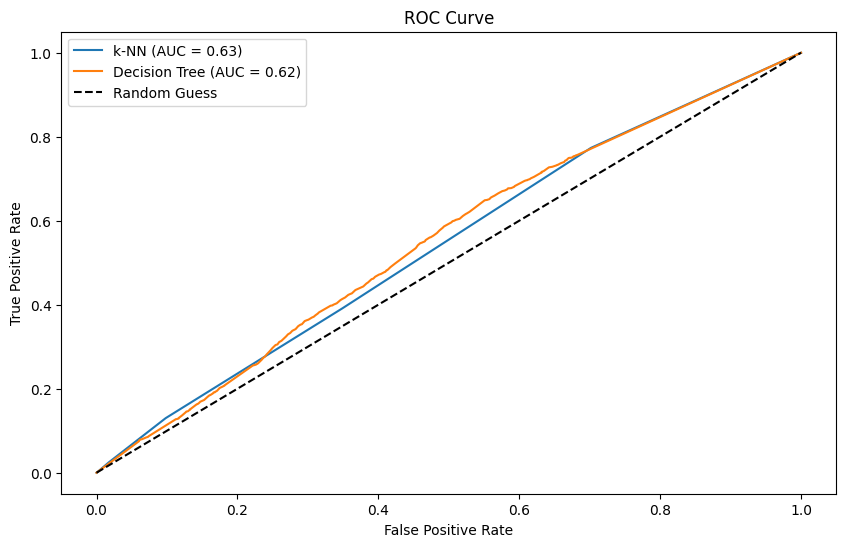

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Akurasi
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Presisi, Recall, F1-score (sudah dihitung sebelumnya dalam classification_report)
precision_knn = report_df.loc['weighted avg', 'precision']
recall_knn = report_df.loc['weighted avg', 'recall']
f1_knn = report_df.loc['weighted avg', 'f1-score']

precision_dt = report_dt_df.loc['weighted avg', 'precision']
recall_dt = report_dt_df.loc['weighted avg', 'recall']
f1_dt = report_dt_df.loc['weighted avg', 'f1-score']

# AUC
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')

# ROC Curve (contoh untuk kelas tertentu, misalnya kelas 1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1], pos_label=1)

# Menampilkan hasil
print("Metrik Evaluasi k-NN:")
print(f"Akurasi: {accuracy_knn}")
print(f"Presisi: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print(f"AUC: {auc_knn}")

print("\nMetrik Evaluasi Decision Tree:")
print(f"Akurasi: {accuracy_dt}")
print(f"Presisi: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")
print(f"AUC: {auc_dt}")

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()